In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file = 'spam.csv'

In [6]:
df = pd.read_csv(file)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [7]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [8]:
df = pd.read_csv(file,encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**Data Cleaning**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [15]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
#ham = 0 and spam = 1
df['target'].head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int32

In [20]:
#checking missing values
df.isnull().sum()


target    0
text      0
dtype: int64

In [21]:
#checking the number of duplicate values
df.duplicated().sum()

403

In [22]:
#dropping duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

EDA

In [25]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

C:\Users\DELL\anaconda3\envs\deeplnenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

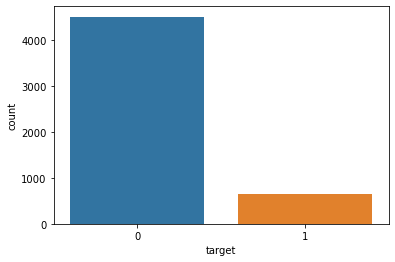

In [26]:
sns.countplot(df['target'])

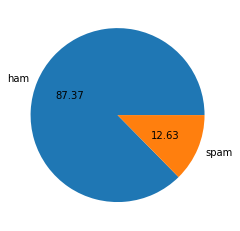

In [27]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [28]:
#data is imbalanced
#calculating the number of characters, words and sententes in our dataframe
!pip install nltk

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
#number of characters
df['num_of_chars'] = df['text'].apply(len)

In [32]:
df.head()

,target,text,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [34]:
#number of words
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_of_chars,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [37]:
#number of sentences
df['num_of_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_of_chars,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
df[['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
df[['num_of_chars','num_of_words','num_of_sent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   num_of_chars  5169 non-null   int64
 1   num_of_words  5169 non-null   int64
 2   num_of_sent   5169 non-null   int64
dtypes: int64(3)
memory usage: 290.6 KB


In [41]:
#describe of ham msg
df[df['target'] == 0][['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#describe of spam msg
df[df['target'] == 1][['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_of_chars', ylabel='Count'>

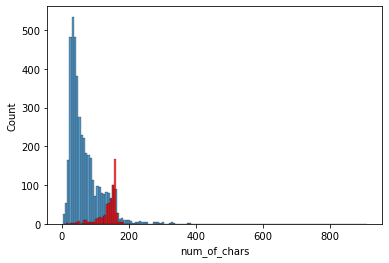

In [43]:
sns.histplot(df[df['target'] == 0]['num_of_chars'])
sns.histplot(df[df['target'] == 1]['num_of_chars'],color='red')

#shows ham msg contains less num_of_chars than spam msgs

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

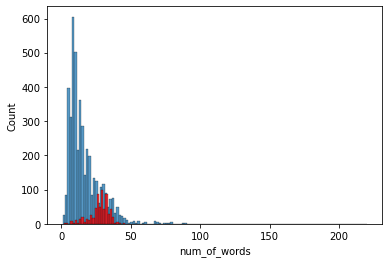

In [44]:
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'],color='red')

#shows ham msg contains less num_of_words than spam msgs

In [45]:
#calculating correlation
df.corr()

,target,num_of_chars,num_of_words,num_of_sent
target,1.000000,0.384717,0.262969,0.267602
num_of_chars,0.384717,1.000000,0.965784,0.626118
num_of_words,0.262969,0.965784,1.000000,0.680882
num_of_sent,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

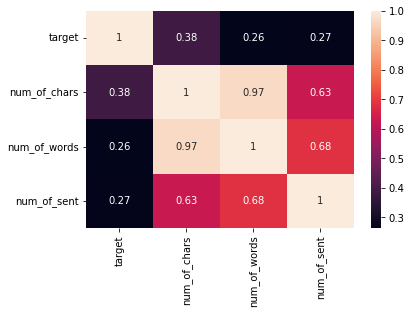

In [46]:
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing**
<br>Analyzing top words used in spam and ham msgs.
<br>
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [47]:
#we will perform all the above operation inside transform function

def transform(text):
    text = text.lower() #transform the given data into lower case
    text = nltk.word_tokenize(text) #split the data(sentences) into words
    
    y = []
    for i in text:
        if i.isalnum(): #removing special characters
            y.append(i)
    text = y.copy()
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:#removing stop words and punctuation
            y.append(i)
            
    text = y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    #return y- this returns list of different words.

In [52]:
transform('Hello I am %% Fine. my name is gaurav?, i am loved by saurav, i am being liked by others')

'hello fine name gaurav love saurav like other'

In [48]:
import nltk
from nltk.corpus import stopwords

In [49]:
#to see stopwords in english
# nltk.download('stopwords')
# stopwords.words('english')

In [50]:
#for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
#for stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [54]:
df['transformed_text'] = df['text'].apply(transform)

In [55]:
df.head()

,target,text,num_of_chars,num_of_words,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
!pip install wordcloud

In [57]:
from wordcloud import WordCloud

In [58]:
wc = WordCloud(width=500,height=300,min_font_size=10,background_color='white')

In [59]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

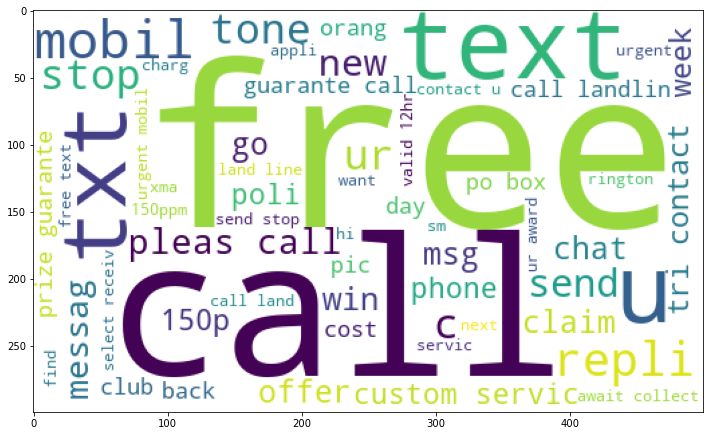

In [60]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [61]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

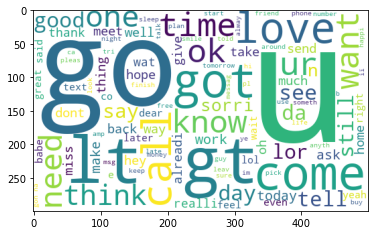

In [62]:
plt.imshow(ham_wc)

In [63]:
#identifying most used words in spam or ham msg

#for spam
spam_corpus = []

#for ham
ham_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
   

In [64]:
#spam_corpus- total spam words in transformed_text
len(spam_corpus)

9939

In [70]:
len(ham_corpus)

35402

In [71]:
type(spam_corpus)

list

In [72]:
from collections import Counter

In [73]:
Counter(spam_corpus).most_common(15)
#these are most common 15 words used in spam messegs

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64)]

In [74]:
Counter(ham_corpus).most_common(15)
#these are most common 15 words used in ham messegs

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('ok', 215),
 ('good', 213)]

In [75]:
data = pd.DataFrame(Counter(spam_corpus).most_common(15))

In [76]:
data.columns = ['text','number']

In [77]:
data

,text,number
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<AxesSubplot:xlabel='text', ylabel='number'>

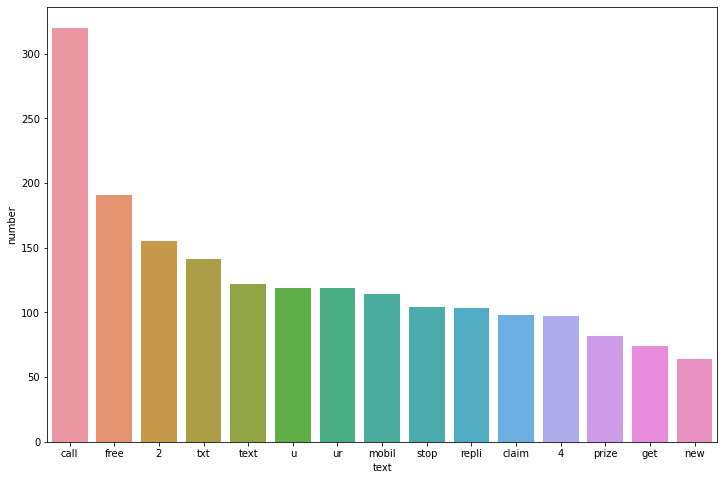

In [78]:
plt.figure(figsize=(12,8))
sns.barplot(x=data['text'],y=data['number'])
#barplot for better visualization of most 15 words used in ham msg

**Model Building**

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
X.shape

(5169, 3000)

In [69]:
y = df['target'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
y.shape

(5169,)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [74]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb_model = gnb.fit(X_train,y_train)
gnb_predict = gnb_model.predict(X_test)

print(accuracy_score(y_test,gnb_predict))
print(confusion_matrix(y_test,gnb_predict))
print(precision_score(y_test,gnb_predict))

0.8578336557059961
[[788 128]
 [ 19  99]]
0.43612334801762115


In [78]:
mnb_model = mnb.fit(X_train,y_train)
mnb_predict = mnb_model.predict(X_test)

print(accuracy_score(y_test,mnb_predict))
print(confusion_matrix(y_test,mnb_predict))
print(precision_score(y_test,mnb_predict))
#MultinomialNB has highest precision score than other naive bayes algorithms for countvectorize

0.97678916827853
[[916   0]
 [ 24  94]]
1.0


In [79]:
bnb_model = bnb.fit(X_train,y_train)
bnb_predict = bnb_model.predict(X_test)

print(accuracy_score(y_test,bnb_predict))
print(confusion_matrix(y_test,bnb_predict))
print(precision_score(y_test,bnb_predict))

#BernoulliNB has highest precision score than other naive bayes algorithms for countvectorize

0.97678916827853
[[914   2]
 [ 22  96]]
0.9795918367346939


In [80]:
import joblib

In [94]:
joblib.dump(cv,'vectorize.pkl')

['vectorize.pkl']

In [81]:
joblib.dump(tfidf,'tfidf.pkl')

['tfidf.pkl']

In [95]:
joblib.dump(bnb_model,'bnb_model.sav')

['bnb_model.sav']

In [82]:
joblib.dump(mnb_model,'mnb_model.sav')

['mnb_model.sav']

testing on new data

In [128]:
msg = 'Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 '


In [129]:
vectorizer = joblib.load('vectorize.pkl')
tfidf = joblib.load('tfidf.pkl')
model = joblib.load('bnb_model.sav')
model_mnb = joblib.load('mnb_model.sav')

In [130]:
data = transform(msg)

In [131]:
data

'today voda number end 7548 select receiv 350 award match pleas call 08712300220'

In [132]:
type(data)

str

In [133]:
# transformed_data = vectorizer.transform([data])
transformed_data = tfidf.transform([data])


In [134]:
prediction = mnb_model.predict(transformed_data)

In [135]:
#0 for ham and 1 for spam
prediction[0]

1